In [81]:
import os
import keras
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import layers
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [82]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [83]:
# Specify GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [84]:
size = (64, 64)

# Normalize image color values
datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    rotation_range = 20,       # Rotate images up to 20 degrees
    width_shift_range = 0.2,   # Shift width by 20%
    height_shift_range = 0.2,  # Shift height by 20%
    shear_range = 0.2,         # Shear distortion
    zoom_range = 0.2,          # Zoom into images
    horizontal_flip = True,    # Flip images horizontally
    fill_mode = "nearest"      # Fill missing pixels with nearest values
)

# Specify path, target shape, batch size, classifier output, color mode, and shuffle
train_generator = datagen.flow_from_directory(
    '../data/train',
    target_size = size,
    batch_size = 32,
    class_mode ='binary',
    color_mode = 'rgb',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    '../data/test',
    target_size = size,
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = False
)

Found 20001 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


In [85]:
########### CODE PROVIDED BY PROFESSOR ###########
model = keras.Sequential([
    keras.Input(shape=(64, 64, 3)),  # Explicit Input Layer
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation="sigmoid")  # Binary classification output
])

In [86]:
########### CODE PROVIDED BY PROFESSOR ###########
model.compile(
	optimizer="adam",
    loss="binary_crossentropy",
	metrics=["accuracy"]
)

In [87]:
# Setup callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)

In [88]:
history = model.fit(
    train_generator,
    epochs = 30,
    callbacks = [early_stopping , model_checkpoint],
    validation_data = test_generator,
    verbose = 2
)

Epoch 1/30


/Users/langtowl/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


626/626 - 32s - 51ms/step - accuracy: 0.5313 - loss: 0.6978 - val_accuracy: 0.6109 - val_loss: 0.6706
Epoch 2/30


626/626 - 30s - 48ms/step - accuracy: 0.5923 - loss: 0.6749 - val_accuracy: 0.6349 - val_loss: 0.6310
Epoch 3/30


626/626 - 29s - 47ms/step - accuracy: 0.6136 - loss: 0.6723 - val_accuracy: 0.6763 - val_loss: 0.5884
Epoch 4/30


626/626 - 28s - 45ms/step - accuracy: 0.6393 - loss: 0.6549 - val_accuracy: 0.7089 - val_loss: 0.5653
Epoch 5/30


626/626 - 28s - 45ms/step - accuracy: 0.6719 - loss: 0.6159 - val_accuracy: 0.7023 - val_loss: 0.5599
Epoch 6/30


626/626 - 28s - 45ms/step - accuracy: 0.6857 - loss: 0.6049 - val_accuracy: 0.7203 - val_loss: 0.5498
Epoch 7/30


626/626 - 28s - 45ms/step - accuracy: 0.6912 - loss: 0.5987 - val_accuracy: 0.7594 - val_loss: 0.5043
Epoch 8/30
626/626 - 28s - 45ms/step - accuracy: 0.7010 - loss: 0.5884 - val_accuracy: 0.7231 - val_loss: 0.5720
Epoch 9/30


626/626 - 28s - 45ms/step - accuracy: 0.7118 - loss: 0.5774 - val_accuracy: 0.7720 - val_loss: 0.4765
Epoch 10/30
626/626 - 29s - 46ms/step - accuracy: 0.7195 - loss: 0.5778 - val_accuracy: 0.6669 - val_loss: 0.6063
Epoch 11/30
626/626 - 30s - 47ms/step - accuracy: 0.7298 - loss: 0.5557 - val_accuracy: 0.7313 - val_loss: 0.5974
Epoch 12/30
626/626 - 29s - 47ms/step - accuracy: 0.7345 - loss: 0.5581 - val_accuracy: 0.7628 - val_loss: 0.5322
Epoch 13/30
626/626 - 28s - 45ms/step - accuracy: 0.7322 - loss: 0.5638 - val_accuracy: 0.7576 - val_loss: 0.5128
Epoch 14/30


626/626 - 28s - 46ms/step - accuracy: 0.7372 - loss: 0.5546 - val_accuracy: 0.8084 - val_loss: 0.4325
Epoch 15/30
626/626 - 29s - 46ms/step - accuracy: 0.7566 - loss: 0.5236 - val_accuracy: 0.7812 - val_loss: 0.4958
Epoch 16/30
626/626 - 28s - 45ms/step - accuracy: 0.7517 - loss: 0.5396 - val_accuracy: 0.7728 - val_loss: 0.5154
Epoch 17/30


626/626 - 28s - 45ms/step - accuracy: 0.7406 - loss: 0.5654 - val_accuracy: 0.8120 - val_loss: 0.4275
Epoch 18/30


626/626 - 29s - 46ms/step - accuracy: 0.7517 - loss: 0.5353 - val_accuracy: 0.8102 - val_loss: 0.4105
Epoch 19/30


626/626 - 29s - 46ms/step - accuracy: 0.7602 - loss: 0.5217 - val_accuracy: 0.8306 - val_loss: 0.3963
Epoch 20/30
626/626 - 29s - 46ms/step - accuracy: 0.7612 - loss: 0.5297 - val_accuracy: 0.7984 - val_loss: 0.4340
Epoch 21/30
626/626 - 28s - 45ms/step - accuracy: 0.7738 - loss: 0.5010 - val_accuracy: 0.8066 - val_loss: 0.5313
Epoch 22/30
626/626 - 28s - 45ms/step - accuracy: 0.7634 - loss: 0.5373 - val_accuracy: 0.7890 - val_loss: 0.4508
Epoch 23/30


626/626 - 28s - 45ms/step - accuracy: 0.7658 - loss: 0.5166 - val_accuracy: 0.8394 - val_loss: 0.3699
Epoch 24/30
626/626 - 28s - 45ms/step - accuracy: 0.7729 - loss: 0.5068 - val_accuracy: 0.8270 - val_loss: 0.4065
Epoch 25/30
626/626 - 28s - 45ms/step - accuracy: 0.7722 - loss: 0.5189 - val_accuracy: 0.8354 - val_loss: 0.3701
Epoch 26/30
626/626 - 28s - 44ms/step - accuracy: 0.7765 - loss: 0.5084 - val_accuracy: 0.8436 - val_loss: 0.4175
Epoch 27/30
626/626 - 28s - 44ms/step - accuracy: 0.7777 - loss: 0.5128 - val_accuracy: 0.8320 - val_loss: 0.3889
Epoch 28/30
626/626 - 28s - 44ms/step - accuracy: 0.7739 - loss: 0.5231 - val_accuracy: 0.7976 - val_loss: 0.5581


In [89]:
########### CODE PROVIDED BY PROVESSOR ###########
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,863,429 (49.07 MB)

 Trainable params: 4,287,809 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,575,620 (32.71 MB)

In [90]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

157/157 - 3s - 19ms/step - accuracy: 0.8394 - loss: 0.3699
Test loss: 0.36994272470474243
Test accuracy: 0.8393678665161133


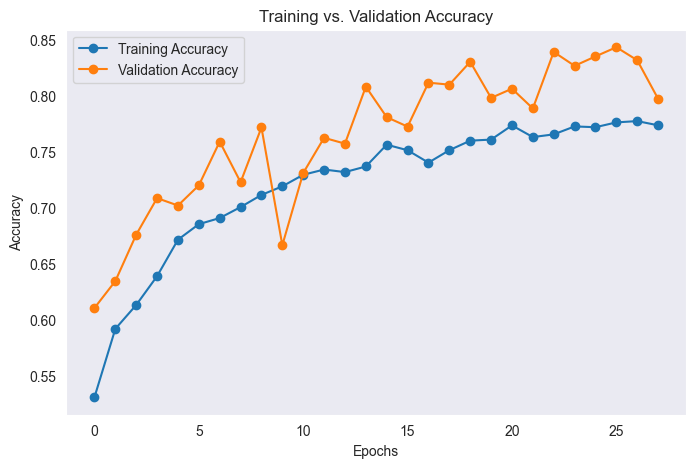

In [91]:
# Plot training vs validation accuracy
plt.figure(figsize = (8, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

In [92]:
# Get true labels
true_labels = test_generator.classes

In [93]:
# Get predictions
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


In [94]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

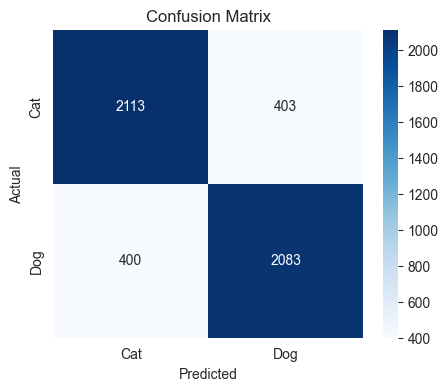

              precision    recall  f1-score   support

         Cat       0.84      0.84      0.84      2516
         Dog       0.84      0.84      0.84      2483

    accuracy                           0.84      4999
   macro avg       0.84      0.84      0.84      4999
weighted avg       0.84      0.84      0.84      4999



In [95]:
# Display confusion matrix
plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Cat", "Dog"], yticklabels = ["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(true_labels, pred_labels, target_names = ["Cat", "Dog"]))
